<a href="https://colab.research.google.com/github/allanbraquiel/desafio_churn_foursys/blob/main/Desafio_Churn_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # DESAFIO TRAINEES – DATA&LAB 2021

# Análise de Churn em empresas de Telecom

Um dos principais desafios em companhias que trabalham com produtos massificados é desenvolver estratégias de retenção de clientes, que permitam manter ou até ampliar sua receita sem a necessidade do custo de aquisição de novos clientes.

Neste sentido, seja no caso de clientes que realizam contratações de médio / longo prazo destes serviços ou clientes que preferem um formato de contratação mensal, é necessário monitorar frequentemente alguns indicadores ou variáveis que possam apontar para um possível abandono
(churn) deste cliente, muitas vezes por baixa qualidade do serviço ou atendimento, propostas financeiramente mais atrativas ou serviços diferenciados da concorrência, pra citar alguns exemplos.

Vejamos uma análise exploratória dos dados para identifcar padrões e poder definir uma estratégia para a manutenção destes clientes.

Carregando as bibliotecas que serão utilizadas para estra análise

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Carregando os arquivos com os dados que serão analisados

In [37]:
churn_data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Desafio Foursys/churn_data.csv")
customer_data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Desafio Foursys/customer_data.csv")
internet_data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Desafio Foursys/internet_data.csv")
telecom_dict = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Desafio Foursys/Telecom+Churn+Data+Dictionary.csv", encoding="latin1")

In [38]:
telecom_dict

,S.No.,Variable Name,Meaning
0,1,CustomerID,The unique ID of each customer
1,2,Gender,The gender of a person
2,3,SeniorCitizen,Whether a customer can be classified as a seni...
3,4,Partner,If a customer is married/ in a live-in relatio...
4,5,Dependents,If a customer has dependents (children/ retire...
5,6,Tenure,The time for which a customer has been using t...
6,7,PhoneService,Whether a customer has a landline phone servic...
7,8,MultipleLines,Whether a customer has multiple lines of inter...
8,9,InternetService,The type of internet services chosen by the cu...
9,10,OnlineSecurity,Specifies if a customer has online security.


In [39]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [40]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [41]:
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [42]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   MultipleLines     7043 non-null   object
 2   InternetService   7043 non-null   object
 3   OnlineSecurity    7043 non-null   object
 4   OnlineBackup      7043 non-null   object
 5   DeviceProtection  7043 non-null   object
 6   TechSupport       7043 non-null   object
 7   StreamingTV       7043 non-null   object
 8   StreamingMovies   7043 non-null   object
dtypes: object(9)
memory usage: 495.3+ KB


In [43]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


Para realizar esta análise, vamos fazer a união dos três arquivos

In [45]:
df_union = churn_data.merge(customer_data, how="inner", on="customerID").merge(internet_data, how="inner", on="customerID")

In [46]:
df_union.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [47]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [48]:
df_union.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

Traduzindo o nome das colunas para melhorar o entendimento

In [49]:
df_union.rename(columns = {"customerID": "ClienteID", "tenure": "TempoServico", "PhoneService": "ServicoTelefone", "Contract": "Contrato",
                           "PaperlessBilling": "FaturaSemPapel", "PaymentMethod": "FormaPagamento", "MonthlyCharges": "EncargosMensais",
                           "TotalCharges": "CustoTotal", "gender": "Genero", "SeniorCitizen": "Idoso", "Partner": "Casado", 
                           "Dependents": "Dependentes", "MultipleLines": "MultiplasLinhas", 'InternetService': "ServicoInternet", 
                           'OnlineSecurity': "SegurancaOnline", 'OnlineBackup': "BackupOnline", 'DeviceProtection': "ProtecaoDispositivo", 
                           'TechSupport': "SuporteTecnico", 'StreamingMovies': "StreamingFilmes"}, inplace=True)

Alterar os valores da coluna Churn

In [50]:
def altera_nome(nome):
  if nome == "Yes":
    return "Sim"
  else:
    return "Não"

df_union.Churn = df_union.Churn.map(altera_nome)

A coluna CustoTotal foi carregada como object, então será alterada para uma variável numérica

In [51]:
df_union.CustoTotal = pd.to_numeric(df_union["CustoTotal"], errors='coerce')

Para visualizar a prpoporção de clientes que abandonam a empresa, esta série de gráficos irá mostrar com estão distribuídos os clientes que deixam a empresa, de acordo com cada coluna

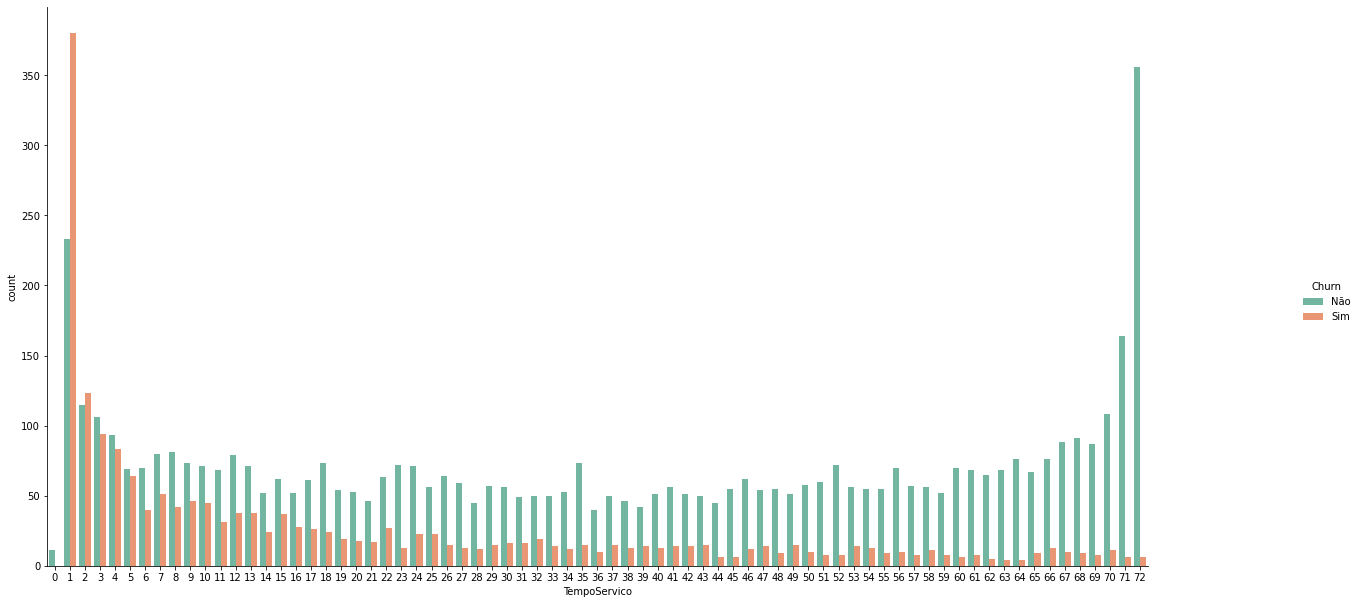

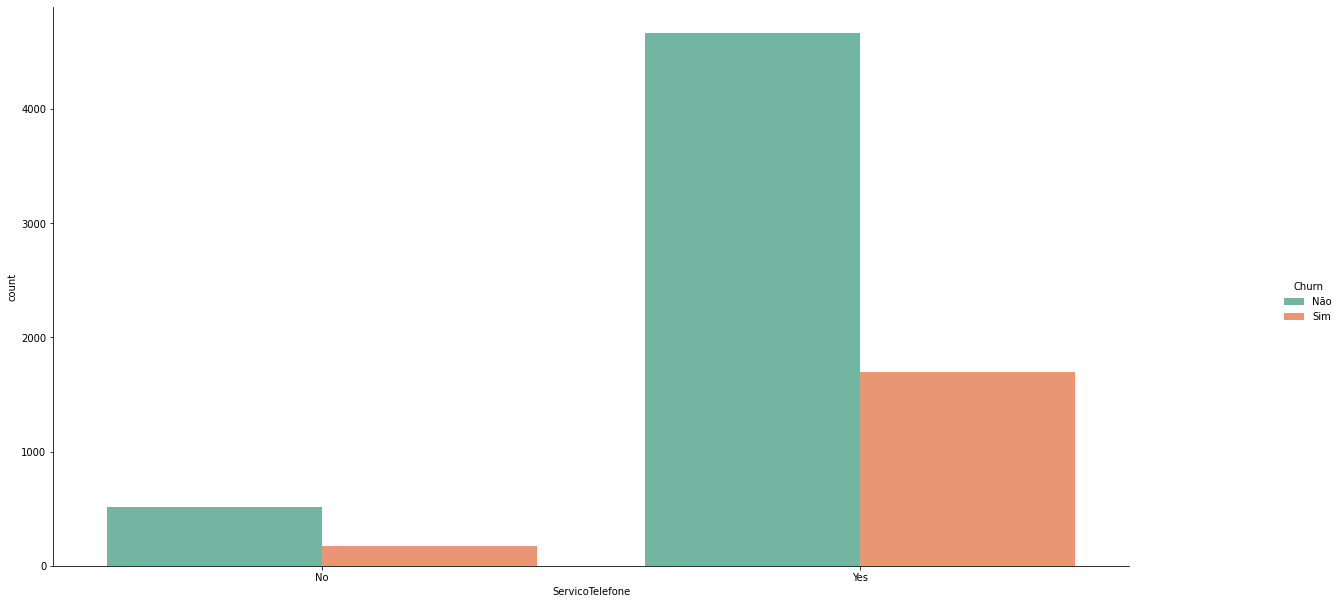

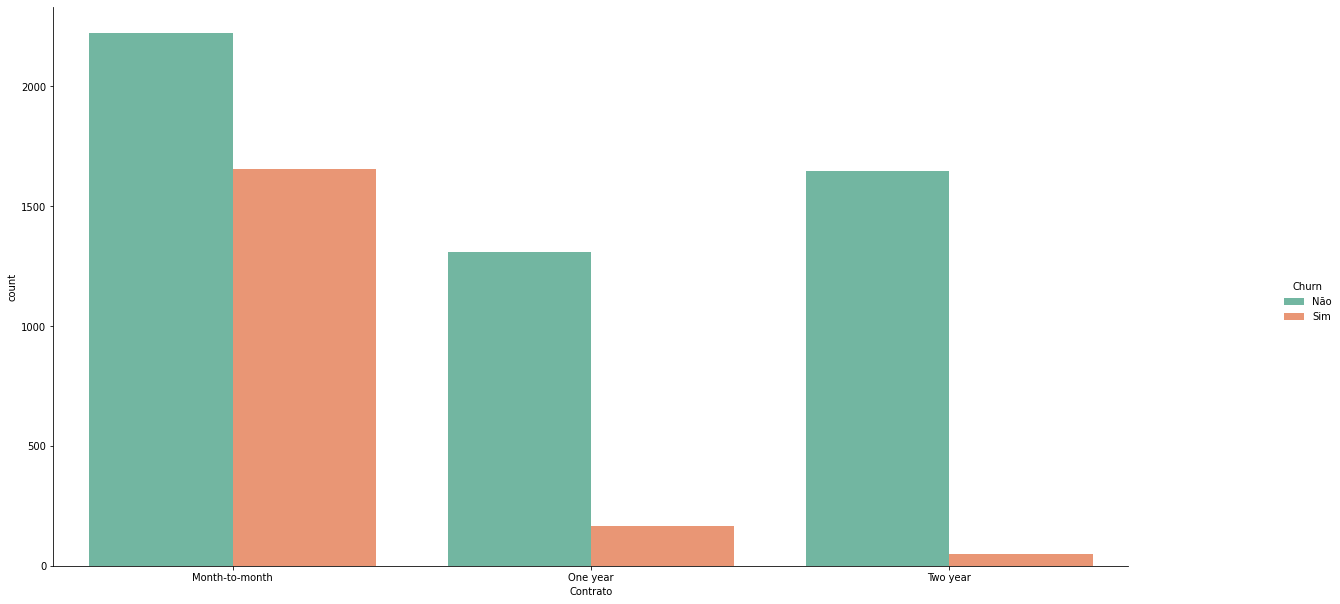

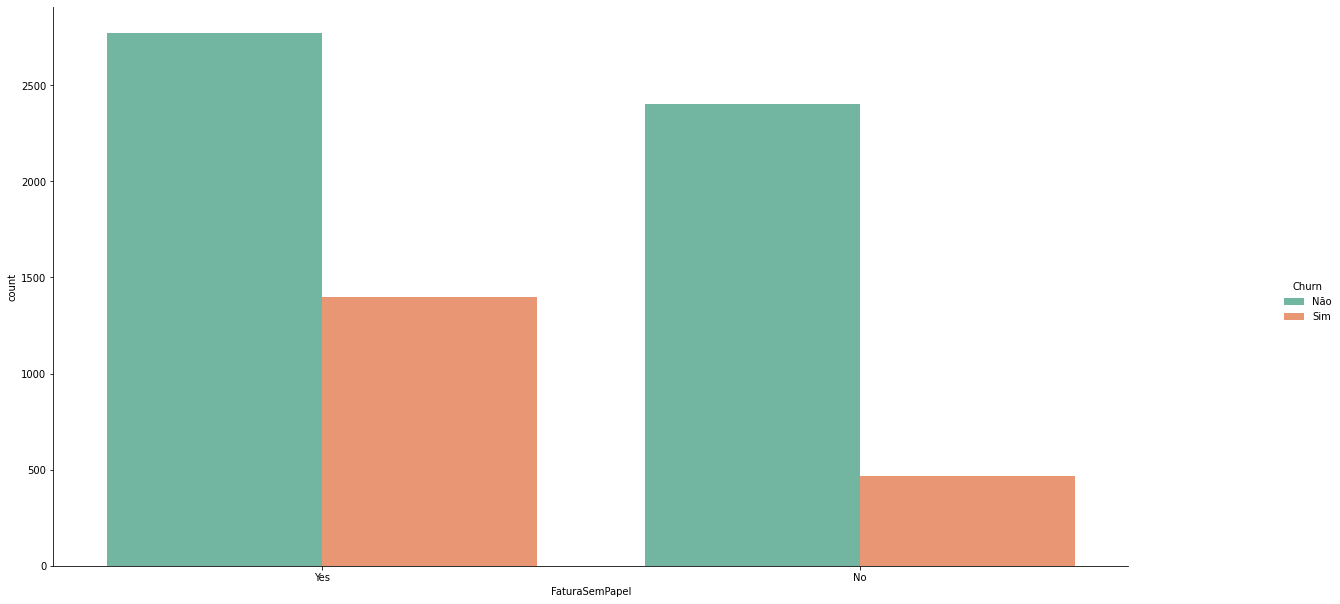

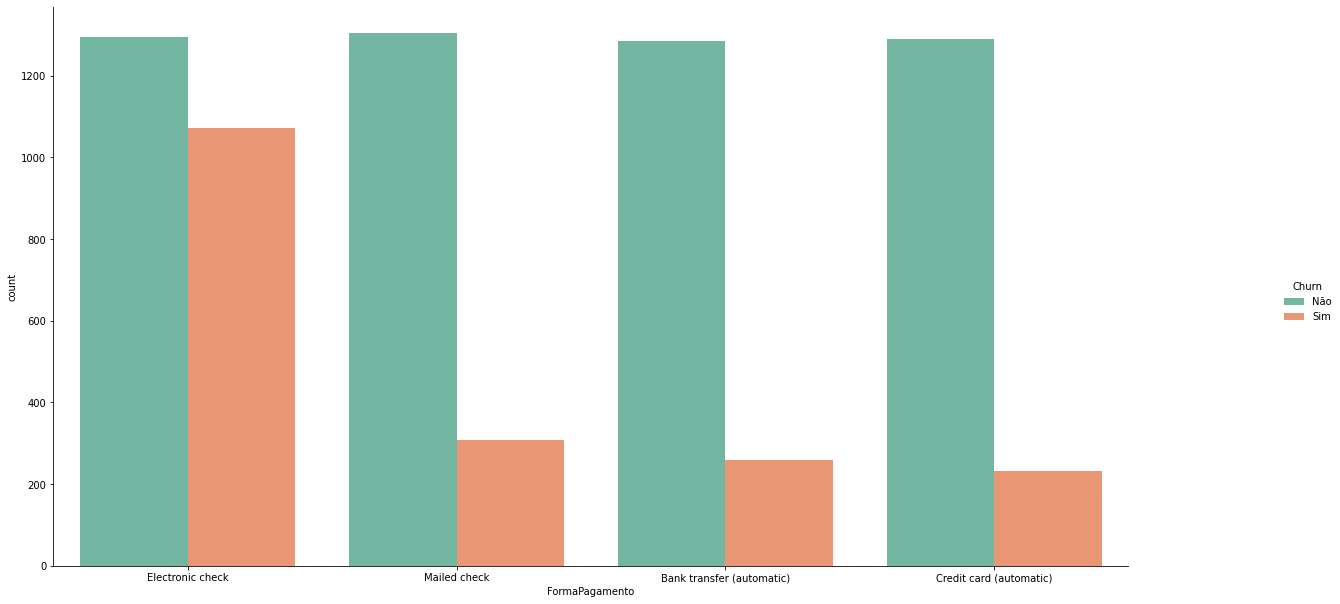

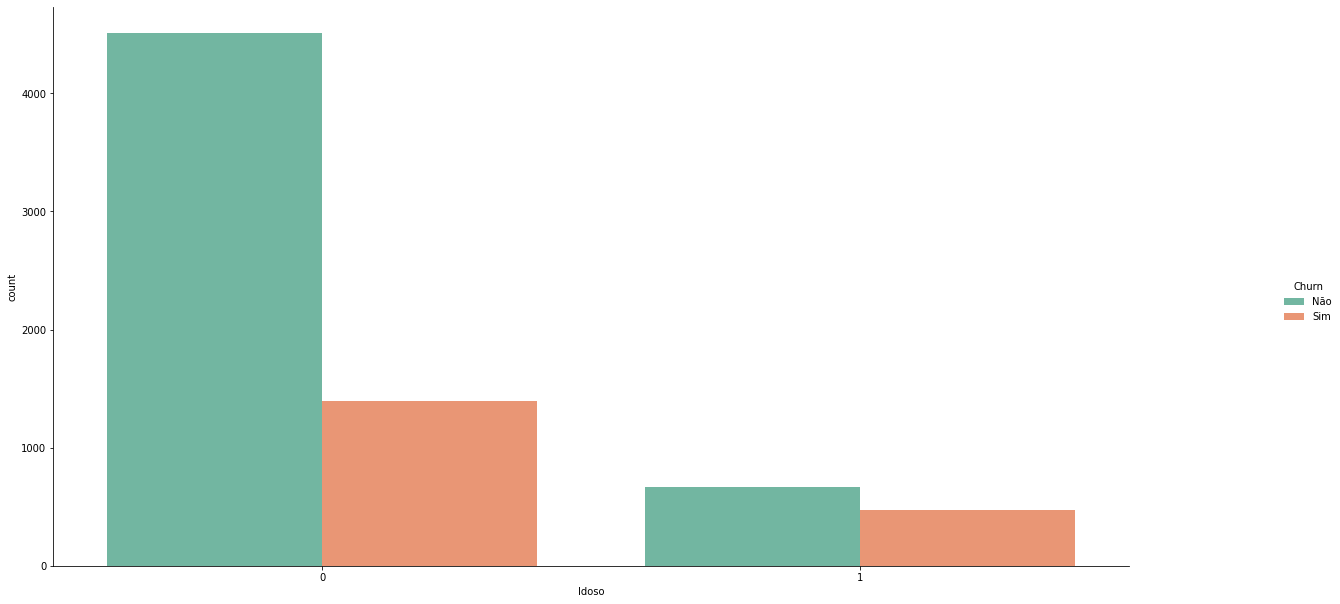

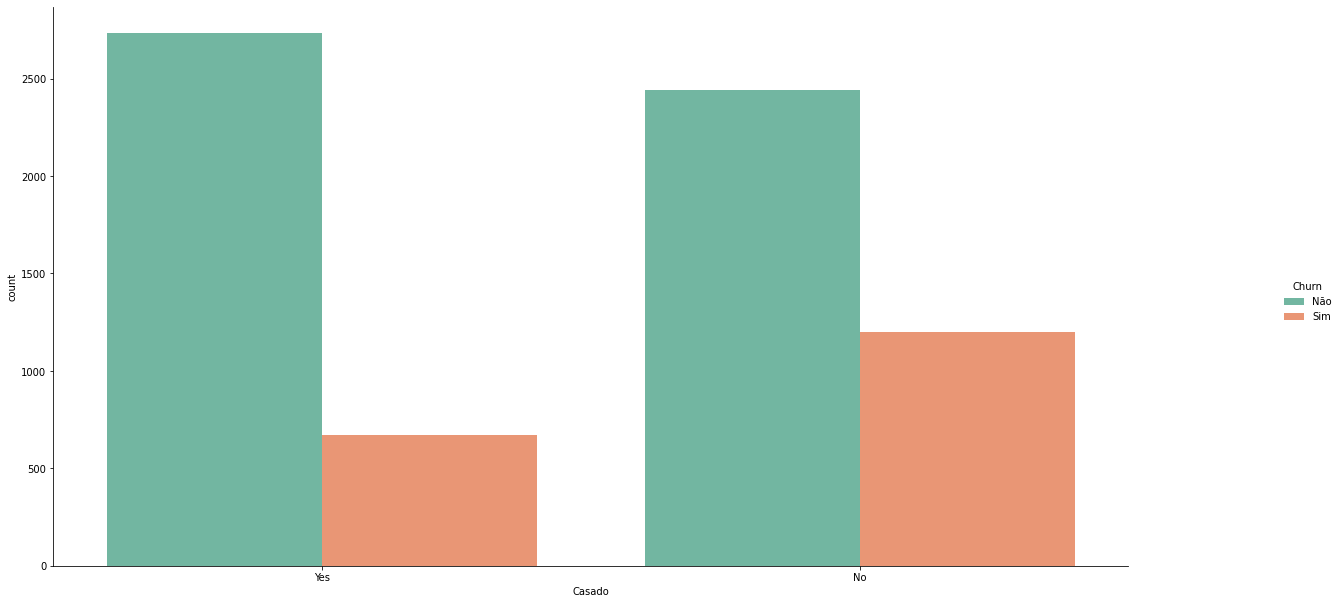

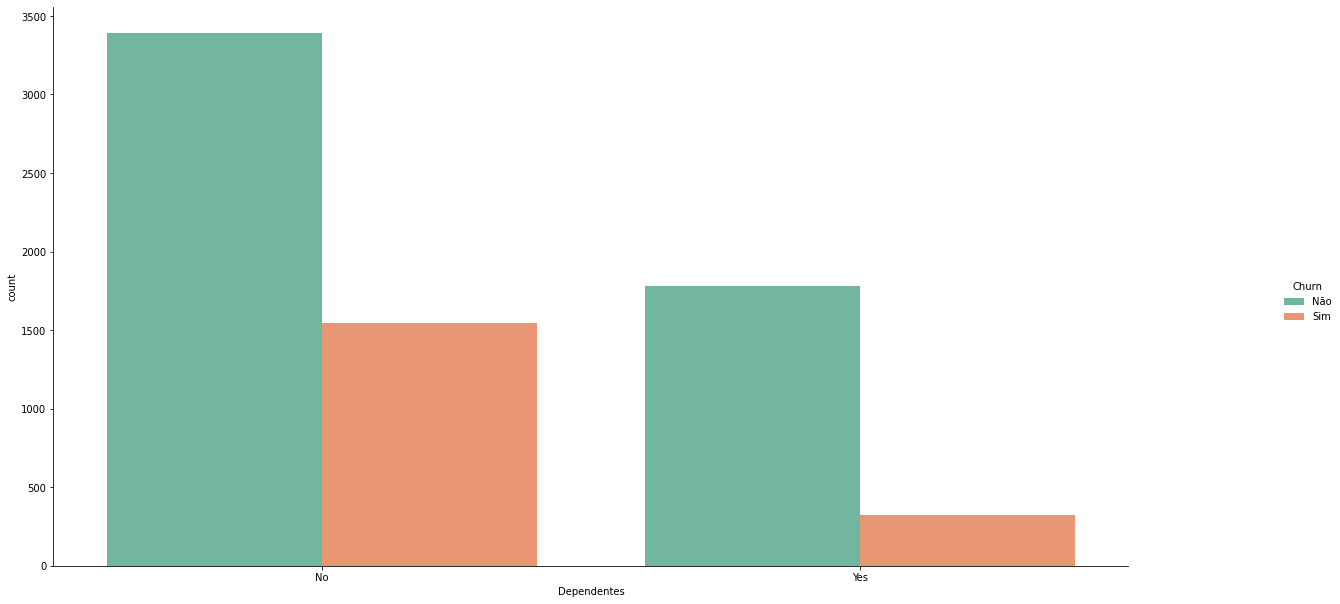

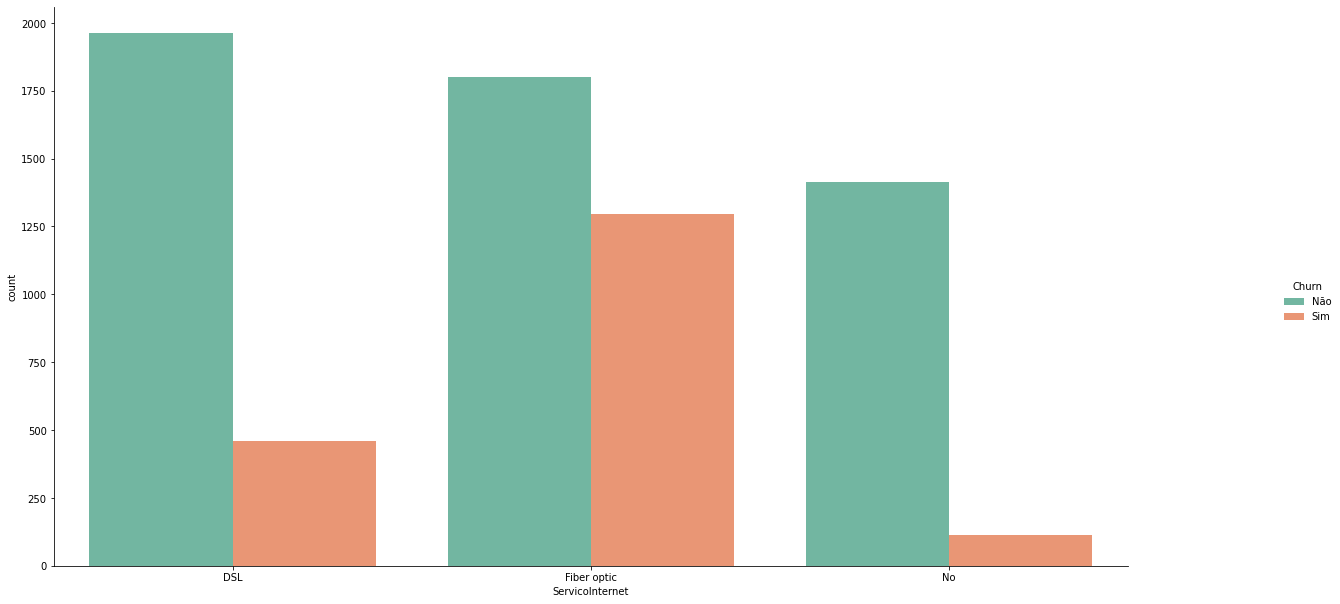

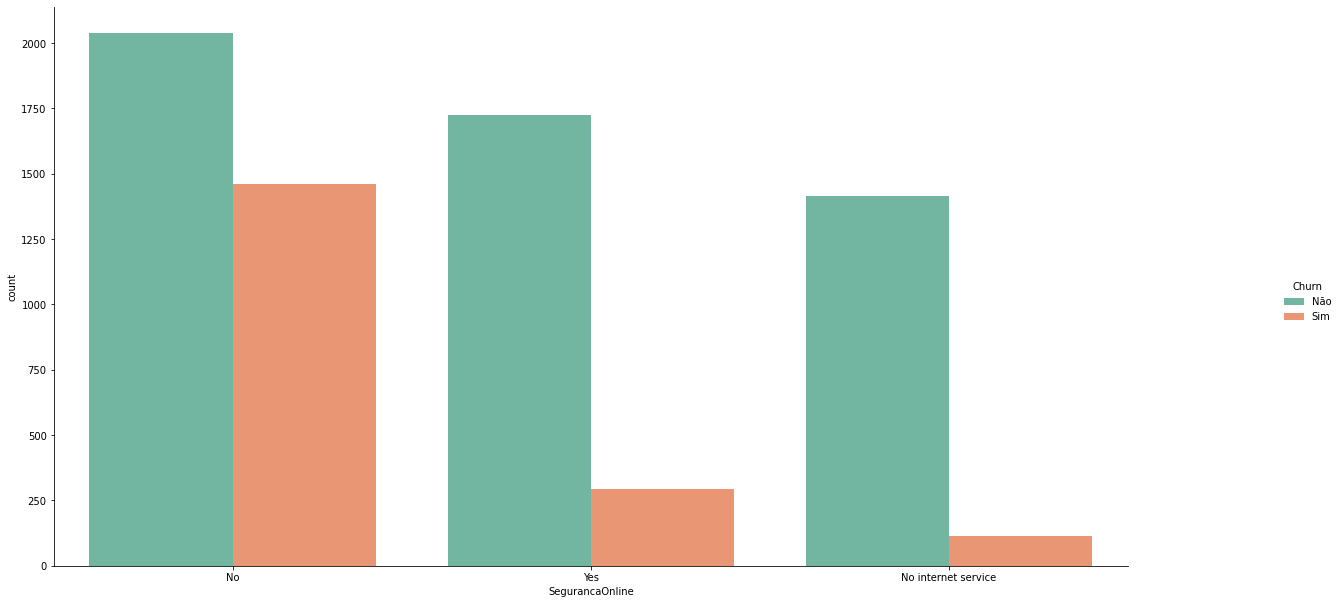

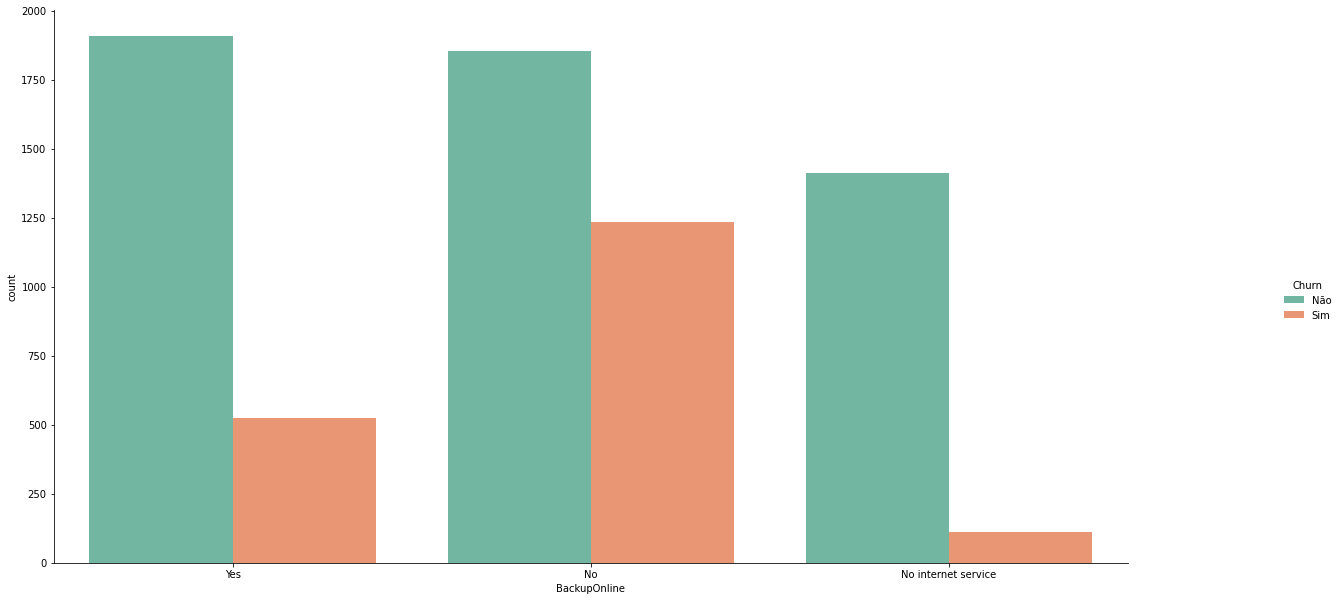

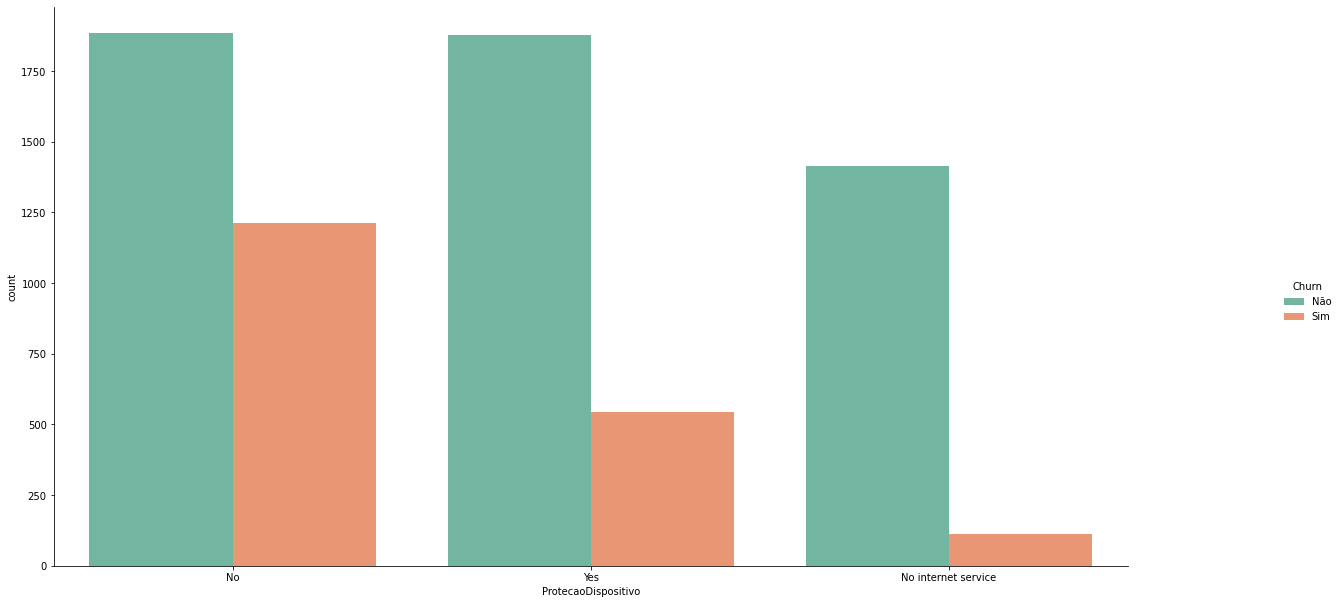

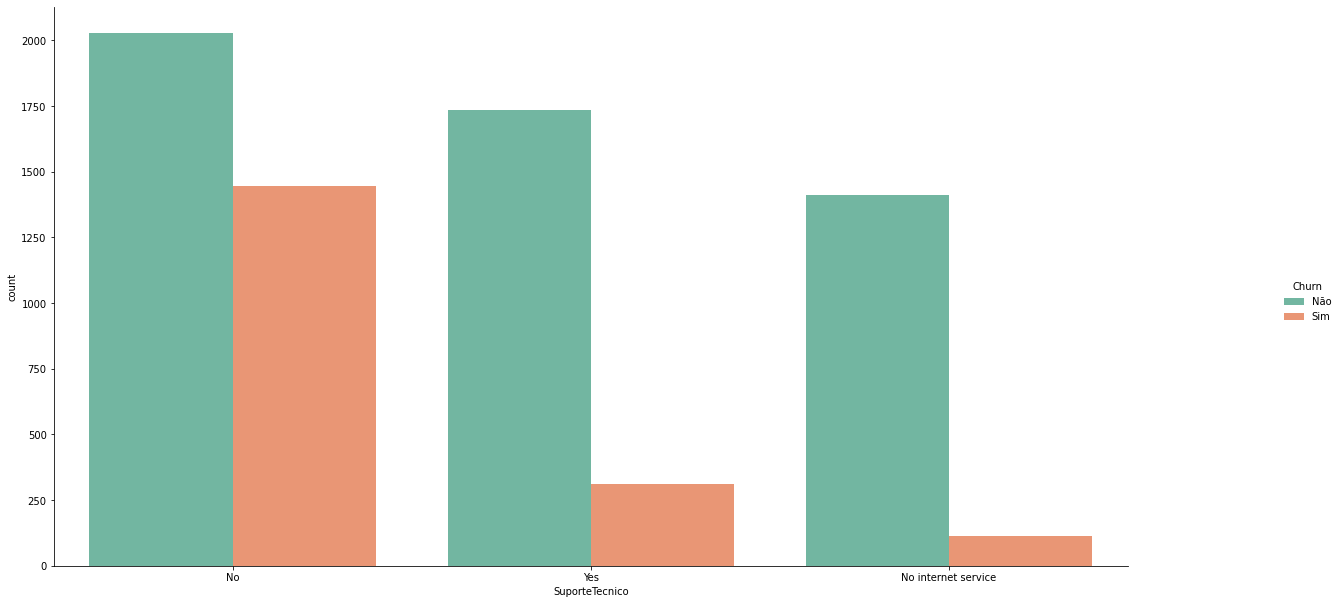

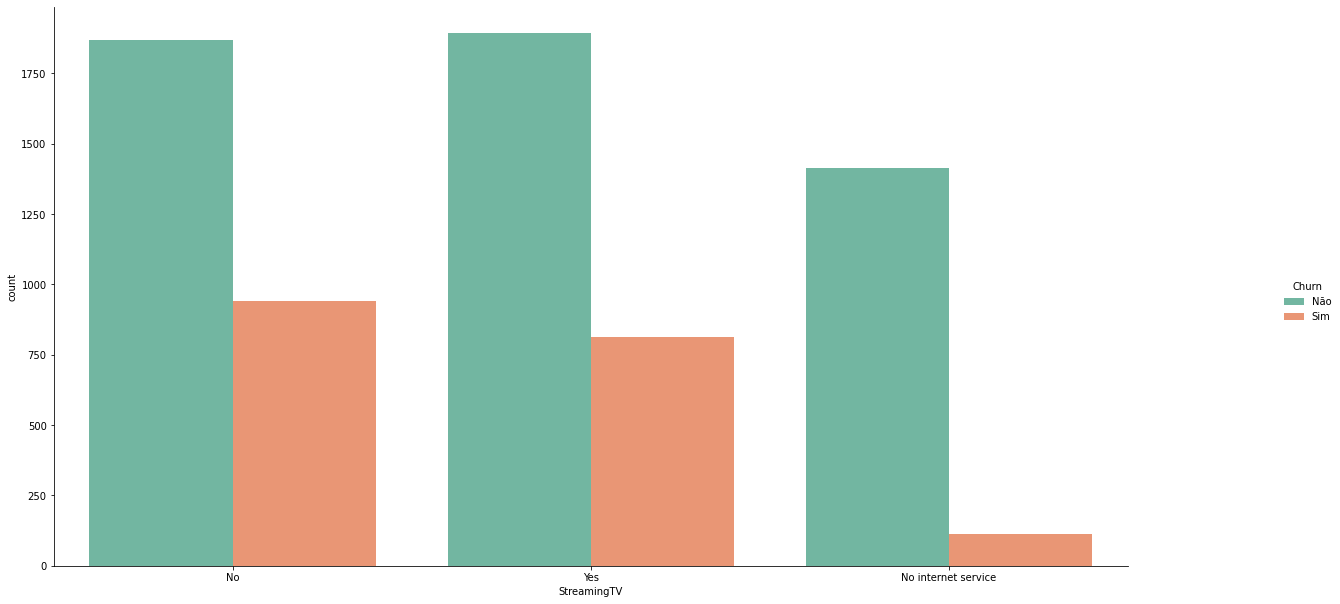

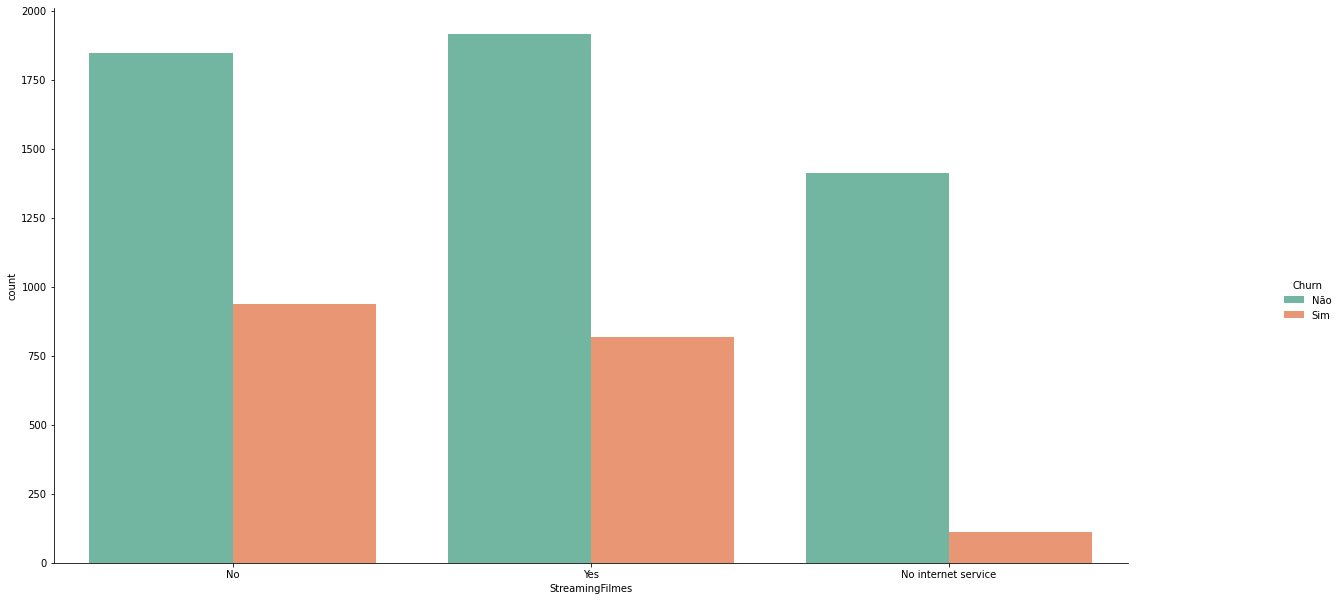

In [53]:
lista = ['TempoServico', 'ServicoTelefone', 'Contrato', 'FaturaSemPapel', 'FormaPagamento', 'Idoso', 'Casado', 'Dependentes',
         'ServicoInternet', 'SegurancaOnline', 'BackupOnline', 'ProtecaoDispositivo', 'SuporteTecnico', 'StreamingTV', 'StreamingFilmes']

for i in lista:
  g = sns.catplot(x=i, kind="count", palette="Set2", hue="Churn", data=df_union)
  g.fig.set_figwidth(20.27)
  g.fig.set_figheight(8.7)
  


# Hipóteses a serem analisadas:

Tempo de Serviço: 
Clientes com pouco tempo de serviço, principalmente no primeiro mês, tendem a candelar mais do que os que permanecem mais de 6 meses.

Serviço de Telefone:
Clientes com serviço telefônico cancelam mais dos que não tem

Contrato:
Contratos mensais cancelam mais do que contratos anuais

Fatura sem papel:
Quem opta por fatura sem papel tende a cancelar mais

Forma de pagamento:
Pessoas que optam pela forma de pagamento Electronic check cancelam mais

Encargos Mensais:
A maioria dos clientes que cancelam tem encargos mensais entre 70 e 100 reais

Custo total:
Clientes que gastam até 200 reais são os que mais cancelam

Gênero:
O gênero é indiferente

Idoso:
Pessas jovens cancelam mais do que os idosos

Casado:
Pessoas casadas mantém o contrato por mais tempo do que solteiros

Dependentes:
Pessoas com filhos não cancelam tanto quanto os que não tem filhos

Multiplas Linhas:
Proporcionalmente é indiferente

Serviço Internet:
Clientes que utilizarm Fibra optica cancelam mais

Segurança Online:
Clientes que não tem este serviço cancelam mais

Backup Online:
Quem não tem backup online cancelam mais

Proteção dispositivo:
Quem não tem proteção de dispositivo cancelam mais

Suporte Tecnico:
Os cliente que não tem suporte técnico cancelam mais

Streaming tv:
Quem não tem este serviço cancela mais

Streaming filmes:
Pouca diferença entre quem tem e não tem





**Agora podemos separar este conjunto de dados em 3 grande grupos:**

**Pessoa:**


> Gênero

> Idoso

> Casado

> Dependentes


**Contrato:**

> Tempo de serviço

> Serviço de telefone

> Contrato

> Fatura sem papel

> Forma de pagamento

> Encargos mensais

> Custo total


**Serviços:**

> Múltiplas linhas

> Serviços Internet

> Segurança online

> Backup online

> Proteção de dispositivo

> Suporte Tecnico

> Streaming TV

> Streaming Filmes




Após esta separação, podemos verificar qual a proporção de clientes com estas características em comum, como clientes jovens, solteiros e que não tem dependentes.

In [54]:
pessoa = df_union.query("Casado == 'No' and Dependentes == 'No' and Idoso == 0")

Primeiramente, vamos ver a proporção total de clientes que cancelam o serviço

In [55]:
df_union.Churn.value_counts(normalize=True).map('{:.2%}'.format)

Não    73.46%
Sim    26.54%
Name: Churn, dtype: object

Agora, a proporção de cancelamentos com pessoas com as características citadas acima:

In [56]:
pessoa.Churn.value_counts(normalize=True).map('{:.2%}'.format)

Não    68.85%
Sim    31.15%
Name: Churn, dtype: object

Agora vamos reunir clientes com características apresentadas nas hipósteses levantadas anteriormente:

In [57]:
contrato = df_union.query("TempoServico < 3 and ServicoTelefone == 'Yes' and Contrato == 'Month-to-month' & FaturaSemPapel == 'Yes' & FormaPagamento == 'Electronic check' & (EncargosMensais >= 70 and EncargosMensais <=100)")

In [58]:
contrato.Churn.value_counts(normalize=True).map('{:.2%}'.format)

Sim    81.82%
Não    18.18%
Name: Churn, dtype: object

Os clientes que não tem serviços adicionais em seu contrato:

In [59]:
servicos = df_union.query("ServicoInternet == 'Fiber optic' and SegurancaOnline == 'No' and BackupOnline == 'No' and ProtecaoDispositivo == 'No' and SuporteTecnico == 'No'")

In [60]:
servicos.Churn.value_counts(normalize=True).map('{:.2%}'.format)

Sim    63.56%
Não    36.44%
Name: Churn, dtype: object

# Conclusões

Entre pessoas Jovens, solteiros e sem filhos a proporção de clientes que abandonam a empresa aumenta 5 % em relação ao total geral.

Entre pessoas que tem um contrato a menos de 3 meses, em contratos mensais e forma de pagamento Cheque eletrônico, que gasta entre 70 e 100 Reais, tem um aumento de abandono de 55%, em proporção ao total geral.

Entre pessoas que não tem serviços como fibra optica, segurança online, backup online e suporte técnico, tem um aumento de 37%.



# Estratégia para retenção de clientes

> Oferecer um desconto ou serviço adicional para os contratos de um ano ou dois

> Oferecer serviços gratuitos como suporte técnico, segurança online, proteção do dispositivo e backup online nos 3 primeiros meses.

> Dar desconto para quem utilizar o débito automático ou transferência eletrônica


# Realizando previsões para novos clientes

Agora que descobrimos o que aconteceu, e o que pode ser feito para reter os clientes, é importante que possamos identificá-los para que possa ser tomadas ações para evitar o Churn

Para realizar as previsões, que preparar os dados para a criação do modelo de machine learning. A primeira preparação será verificar se há dados nulos e depois transformar dos dados do tipo object para dados categóricos

In [68]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ClienteID            7043 non-null   category
 1   TempoServico         7043 non-null   int64   
 2   ServicoTelefone      7043 non-null   category
 3   Contrato             7043 non-null   category
 4   FaturaSemPapel       7043 non-null   category
 5   FormaPagamento       7043 non-null   category
 6   EncargosMensais      7043 non-null   float64 
 7   CustoTotal           7043 non-null   float64 
 8   Churn                7043 non-null   category
 9   Genero               7043 non-null   category
 10  Idoso                7043 non-null   int64   
 11  Casado               7043 non-null   category
 12  Dependentes          7043 non-null   category
 13  MultiplasLinhas      7043 non-null   category
 14  ServicoInternet      7043 non-null   category
 15  SegurancaOnline      

Verificando se há dados nulos

In [62]:
df_union.isnull().sum()

ClienteID               0
TempoServico            0
ServicoTelefone         0
Contrato                0
FaturaSemPapel          0
FormaPagamento          0
EncargosMensais         0
CustoTotal             11
Churn                   0
Genero                  0
Idoso                   0
Casado                  0
Dependentes             0
MultiplasLinhas         0
ServicoInternet         0
SegurancaOnline         0
BackupOnline            0
ProtecaoDispositivo     0
SuporteTecnico          0
StreamingTV             0
StreamingFilmes         0
dtype: int64

Comm foram encontrados dados faltantes, é necessário tratálos de alguma forma. Neste caso, iremos utilizar a técnica forward.

In [63]:
df_union = df_union.fillna(method='ffill')

In [64]:
df_union.isnull().sum()

ClienteID              0
TempoServico           0
ServicoTelefone        0
Contrato               0
FaturaSemPapel         0
FormaPagamento         0
EncargosMensais        0
CustoTotal             0
Churn                  0
Genero                 0
Idoso                  0
Casado                 0
Dependentes            0
MultiplasLinhas        0
ServicoInternet        0
SegurancaOnline        0
BackupOnline           0
ProtecaoDispositivo    0
SuporteTecnico         0
StreamingTV            0
StreamingFilmes        0
dtype: int64

In [69]:
lista_objects = df_union.select_dtypes(include=['object']).columns

In [70]:
lista_objects

Index([], dtype='object')

In [71]:
df_union[lista_objects] = df_union[lista_objects].astype("category")

In [72]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ClienteID            7043 non-null   category
 1   TempoServico         7043 non-null   int64   
 2   ServicoTelefone      7043 non-null   category
 3   Contrato             7043 non-null   category
 4   FaturaSemPapel       7043 non-null   category
 5   FormaPagamento       7043 non-null   category
 6   EncargosMensais      7043 non-null   float64 
 7   CustoTotal           7043 non-null   float64 
 8   Churn                7043 non-null   category
 9   Genero               7043 non-null   category
 10  Idoso                7043 non-null   int64   
 11  Casado               7043 non-null   category
 12  Dependentes          7043 non-null   category
 13  MultiplasLinhas      7043 non-null   category
 14  ServicoInternet      7043 non-null   category
 15  SegurancaOnline      

Separando os dados de teste e treino

In [73]:
x = df_union.drop(["ClienteID", "Churn"], axis=1, inplace=False)
y = df_union["Churn"]

In [74]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   TempoServico         7043 non-null   int64   
 1   ServicoTelefone      7043 non-null   category
 2   Contrato             7043 non-null   category
 3   FaturaSemPapel       7043 non-null   category
 4   FormaPagamento       7043 non-null   category
 5   EncargosMensais      7043 non-null   float64 
 6   CustoTotal           7043 non-null   float64 
 7   Genero               7043 non-null   category
 8   Idoso                7043 non-null   int64   
 9   Casado               7043 non-null   category
 10  Dependentes          7043 non-null   category
 11  MultiplasLinhas      7043 non-null   category
 12  ServicoInternet      7043 non-null   category
 13  SegurancaOnline      7043 non-null   category
 14  BackupOnline         7043 non-null   category
 15  ProtecaoDispositivo  

Agora que os dados estão como categóricos, precisamos codificá-los para a preparação para o treinamento do modelo utilizando o Label Encoder

In [77]:
from sklearn import preprocessing

In [78]:
label1 = preprocessing.LabelEncoder()
label2 = preprocessing.LabelEncoder()
label3 = preprocessing.LabelEncoder()
label4 = preprocessing.LabelEncoder()
label5 = preprocessing.LabelEncoder()
label6 = preprocessing.LabelEncoder()
label7 = preprocessing.LabelEncoder()
label8 = preprocessing.LabelEncoder()
label9 = preprocessing.LabelEncoder()
label10 = preprocessing.LabelEncoder()
label11 = preprocessing.LabelEncoder()
label12 = preprocessing.LabelEncoder()
label13 = preprocessing.LabelEncoder()
label14 = preprocessing.LabelEncoder()
label15 = preprocessing.LabelEncoder()


In [79]:
x.Contrato = label1.fit_transform(x.Contrato)
x.FaturaSemPapel = label2.fit_transform(x.FaturaSemPapel)
x.FormaPagamento = label3.fit_transform(x.FormaPagamento)
x.Genero = label4.fit_transform(x.Genero)
x.Casado = label5.fit_transform(x.Casado)
x.Dependentes = label6.fit_transform(x.Dependentes)
x.MultiplasLinhas = label7.fit_transform(x.MultiplasLinhas)
x.ServicoInternet = label8.fit_transform(x.ServicoInternet)
x.BackupOnline = label9.fit_transform(x.BackupOnline)
x.ProtecaoDispositivo = label10.fit_transform(x.ProtecaoDispositivo)
x.SuporteTecnico = label11.fit_transform(x.SuporteTecnico)
x.StreamingTV = label12.fit_transform(x.StreamingTV)
x.StreamingFilmes = label13.fit_transform(x.StreamingFilmes)
x.ServicoTelefone = label14.fit_transform(x.ServicoTelefone)
x.SegurancaOnline = label15.fit_transform(x.SegurancaOnline)


In [80]:
x.head()

,TempoServico,ServicoTelefone,Contrato,FaturaSemPapel,FormaPagamento,EncargosMensais,CustoTotal,Genero,Idoso,Casado,Dependentes,MultiplasLinhas,ServicoInternet,SegurancaOnline,BackupOnline,ProtecaoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes
0,1,0,0,1,2,29.85,29.85,0,0,1,0,1,0,0,2,0,0,0,0
1,34,1,1,0,3,56.95,1889.50,1,0,0,0,0,0,2,0,2,0,0,0
2,2,1,0,1,3,53.85,108.15,1,0,0,0,0,0,2,2,0,0,0,0
3,45,0,1,0,0,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0
4,2,1,0,1,2,70.70,151.65,0,0,0,0,0,1,0,0,0,0,0,0


In [81]:
x.columns

Index(['TempoServico', 'ServicoTelefone', 'Contrato', 'FaturaSemPapel',
       'FormaPagamento', 'EncargosMensais', 'CustoTotal', 'Genero', 'Idoso',
       'Casado', 'Dependentes', 'MultiplasLinhas', 'ServicoInternet',
       'SegurancaOnline', 'BackupOnline', 'ProtecaoDispositivo',
       'SuporteTecnico', 'StreamingTV', 'StreamingFilmes'],
      dtype='object')

Normalizando os dados

Algumas colunas estão em escalas diferentes, a normalização fará com que todas colunas fiquem com valores numa mesma escala, de 0 a 1.

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
X = scaler.fit_transform(x)
colunas = ['TempoServico', 'ServicoTelefone', 'Contrato', 'FaturaSemPapel',
       'FormaPagamento', 'EncargosMensais', 'CustoTotal', 'Genero', 'Idoso',
       'Casado', 'Dependentes', 'MultiplasLinhas', 'ServicoInternet',
       'SegurancaOnline', 'BackupOnline', 'ProtecaoDispositivo',
       'SuporteTecnico', 'StreamingTV', 'StreamingFilmes']
X = pd.DataFrame(X)
X.columns = colunas

Como ficou o dataset após a normalização

In [84]:
X.head()

,TempoServico,ServicoTelefone,Contrato,FaturaSemPapel,FormaPagamento,EncargosMensais,CustoTotal,Genero,Idoso,Casado,Dependentes,MultiplasLinhas,ServicoInternet,SegurancaOnline,BackupOnline,ProtecaoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes
0,0.013889,0.0,0.0,1.0,0.666667,0.115423,0.001275,0.0,0.0,1.0,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.472222,1.0,0.5,0.0,1.000000,0.385075,0.215867,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.027778,1.0,0.0,1.0,1.000000,0.354229,0.010310,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.625000,0.0,0.5,0.0,0.000000,0.239303,0.210241,1.0,0.0,0.0,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.027778,1.0,0.0,1.0,0.666667,0.521891,0.015330,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0


Separando os dados de treino e teste

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

Para definir as features mais importantes iremos utilizar o algoritmo de Árvore de Decisão para encontrar as variáveis que mais influenciam na criação do modelo

In [86]:
from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier()
arvore.fit(x_train, y_train)
result = arvore.predict(x_test)

In [87]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print(arvore.score(x_test, y_test))
print(confusion_matrix(y_test, result))
print(metrics.classification_report(y_test, result))

0.7406530998580217
[[1281  258]
 [ 290  284]]
              precision    recall  f1-score   support

         Não       0.82      0.83      0.82      1539
         Sim       0.52      0.49      0.51       574

    accuracy                           0.74      2113
   macro avg       0.67      0.66      0.67      2113
weighted avg       0.74      0.74      0.74      2113



In [88]:
arvore.feature_importances_

array([0.11779158, 0.00354848, 0.16540078, 0.02053651, 0.03937387,
       0.20434917, 0.21004382, 0.02789333, 0.01957992, 0.02715287,
       0.01728403, 0.01984618, 0.02521074, 0.04473095, 0.01287847,
       0.01591112, 0.01275861, 0.00513124, 0.01057831])

In [89]:
feature_imp = pd.Series(arvore.feature_importances_, index=X.columns)

In [90]:
feature_imp.sort_values(ascending=False)

CustoTotal             0.210044
EncargosMensais        0.204349
Contrato               0.165401
TempoServico           0.117792
SegurancaOnline        0.044731
FormaPagamento         0.039374
Genero                 0.027893
Casado                 0.027153
ServicoInternet        0.025211
FaturaSemPapel         0.020537
MultiplasLinhas        0.019846
Idoso                  0.019580
Dependentes            0.017284
ProtecaoDispositivo    0.015911
BackupOnline           0.012878
SuporteTecnico         0.012759
StreamingFilmes        0.010578
StreamingTV            0.005131
ServicoTelefone        0.003548
dtype: float64

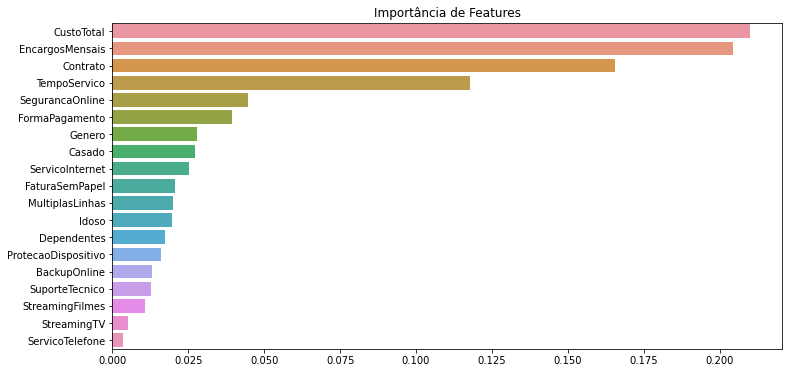

In [91]:
plt.figure(figsize=(12, 6))
feature_imp_sort = feature_imp.sort_values(ascending=False)
sns.barplot(x=feature_imp_sort, y=feature_imp_sort.index)
plt.title("Importância de Features")
plt.show()

Para treinar um modelo precisamos testar vários algoritmos para identificar qual terá o melhor desempenho

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [93]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

# Definindo os valores para o número de folds
num_folds = 5
num_instances = len(X)
seed = 7

# Preparando o modelo

modelos = []
modelos.append(("LogisticRegression", LogisticRegression()))
modelos.append(("DecisionTreeClassifier", DecisionTreeClassifier(random_state=0, max_depth=30, max_features=5)))
modelos.append(("KNeighborsClassifier", KNeighborsClassifier(n_neighbors=17, p=1)))
modelos.append(("MLPClassifier", MLPClassifier(hidden_layer_sizes=(20, 10, 20), max_iter=3000)))
modelos.append(("SuportVectorMachine", SVC(kernel='linear', gamma='auto')))
modelos.append(("NaiveBayes", GaussianNB()))
modelos.append(("RandomForestClassifier", RandomForestClassifier(n_estimators=200, criterion='entropy', n_jobs=-1, max_depth=100, 
                                                                 bootstrap=True, random_state=0)))

# Avaliando cada modelo
resultados = []
nomes = []

for nome, modelo in modelos:
   kfold = KFold(n_splits = num_folds, shuffle=True, random_state = seed)
   cv_results = cross_val_score(modelo, X, y, cv = kfold, scoring = 'f1_macro')
   resultados.append(cv_results)
   nomes.append(nome)
   #msg = "%s - f1-score: %f, Desvio Padrão: %f" % (nome, cv_results.mean(), cv_results.std())
   msg = f"{nome} - f1-score: {cv_results.mean()}, Desvio Padrão: {cv_results.std()}"
   print(msg)

LogisticRegression - f1-score: 0.7292457537866216, Desvio Padrão: 0.020212067543485365
DecisionTreeClassifier - f1-score: 0.6487969353008232, Desvio Padrão: 0.010123753958201835
KNeighborsClassifier - f1-score: 0.7061056094380663, Desvio Padrão: 0.019403661099774167
MLPClassifier - f1-score: 0.6946694727832832, Desvio Padrão: 0.013807341123055577
SuportVectorMachine - f1-score: 0.7213140774754143, Desvio Padrão: 0.022757234590723555
NaiveBayes - f1-score: 0.7165105542227828, Desvio Padrão: 0.012477150323278955
RandomForestClassifier - f1-score: 0.7067753251947481, Desvio Padrão: 0.01716167970638396


Transformando esses resultados em um Dataframe

In [94]:
df_resultado = pd.DataFrame(resultados, columns=["Resultado1", "Resultado2", "Resultado3", "Resultado4", "Resultado5"])
df_resultado

,Resultado1,Resultado2,Resultado3,Resultado4,Resultado5
0,0.746720,0.706888,0.702682,0.749290,0.740649
1,0.659169,0.635316,0.642666,0.661869,0.644966
2,0.731446,0.683366,0.686556,0.724515,0.704645
3,0.699939,0.685174,0.672623,0.706374,0.709237
4,0.727676,0.706888,0.684748,0.745608,0.741650
5,0.723073,0.692457,0.717086,0.727554,0.722382
6,0.713234,0.698065,0.687130,0.736820,0.698627


In [95]:
df_nomes = pd.DataFrame(nomes, columns=["Nomes"])
df_nomes

,Nomes
0,LogisticRegression
1,DecisionTreeClassifier
2,KNeighborsClassifier
3,MLPClassifier
4,SuportVectorMachine
5,NaiveBayes
6,RandomForestClassifier


Agora podemos juntar o Dataframe de nomes e os resultados após cada treinamento

In [96]:
nome_resultado = pd.concat([df_nomes, df_resultado], axis=1)
nome_resultado

,Nomes,Resultado1,Resultado2,Resultado3,Resultado4,Resultado5
0,LogisticRegression,0.746720,0.706888,0.702682,0.749290,0.740649
1,DecisionTreeClassifier,0.659169,0.635316,0.642666,0.661869,0.644966
2,KNeighborsClassifier,0.731446,0.683366,0.686556,0.724515,0.704645
3,MLPClassifier,0.699939,0.685174,0.672623,0.706374,0.709237
4,SuportVectorMachine,0.727676,0.706888,0.684748,0.745608,0.741650
5,NaiveBayes,0.723073,0.692457,0.717086,0.727554,0.722382
6,RandomForestClassifier,0.713234,0.698065,0.687130,0.736820,0.698627


Criando uma coluna com a media dos resultados obtidos em cada treinamento

In [97]:
nome_resultado["Media"] = (nome_resultado["Resultado1"]+ nome_resultado["Resultado2"]+ nome_resultado["Resultado3"]+ 
                           nome_resultado["Resultado4"]+ nome_resultado["Resultado5"]) / 5

nome_resultado.sort_values(by="Media", ascending=False)

,Nomes,Resultado1,Resultado2,Resultado3,Resultado4,Resultado5,Media
0,LogisticRegression,0.746720,0.706888,0.702682,0.749290,0.740649,0.729246
4,SuportVectorMachine,0.727676,0.706888,0.684748,0.745608,0.741650,0.721314
5,NaiveBayes,0.723073,0.692457,0.717086,0.727554,0.722382,0.716511
6,RandomForestClassifier,0.713234,0.698065,0.687130,0.736820,0.698627,0.706775
2,KNeighborsClassifier,0.731446,0.683366,0.686556,0.724515,0.704645,0.706106
3,MLPClassifier,0.699939,0.685174,0.672623,0.706374,0.709237,0.694669
1,DecisionTreeClassifier,0.659169,0.635316,0.642666,0.661869,0.644966,0.648797


Com a média dos resultados obtidos após o treinamento, este gráfico pode nos mostrar de forma mais visível o desempenho de cada modelo

Text(0.5, 1.0, 'Desempenho de cada modelo treinado')

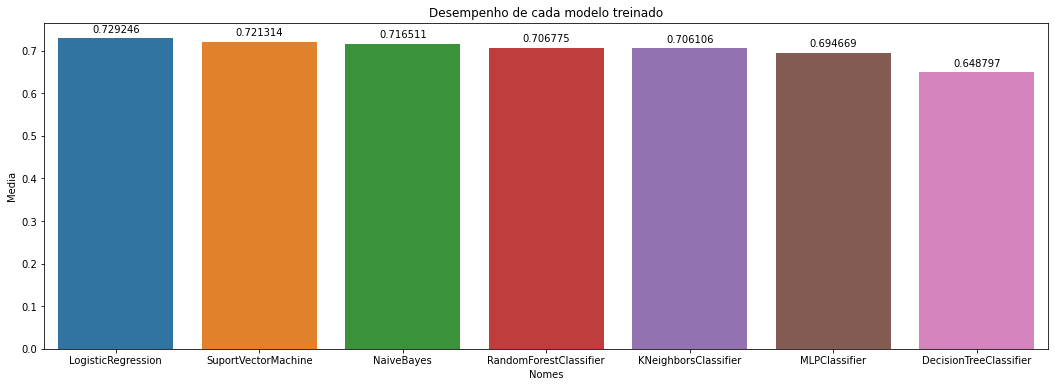

In [98]:
fig = plt.figure(figsize = (18, 6))
splot = sns.barplot(x="Nomes", y="Media", data=nome_resultado.sort_values(by="Media", ascending=False))

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha = 'center', va = 'center', 
    xytext = (0, 9), 
    textcoords = 'offset points')

plt.title("Desempenho de cada modelo treinado")

Após estes resultados, podemos tentar melhorar o desempenho. Para isso vamos treinar o modelo novamente somente com as 5 variáveis mais importantes

In [99]:
X2 = X[["CustoTotal", "EncargosMensais", "Contrato", "TempoServico", "SegurancaOnline"]]

Definidas um novo conjunto de dados, realizaremos um treinamento com cada modelo novamente

In [101]:
num_folds = 5
num_instances = len(X2)
seed = 7

modelos = []
modelos.append(("LogisticRegression", LogisticRegression()))
modelos.append(("DecisionTreeClassifier", DecisionTreeClassifier(random_state=0, max_depth=30, max_features=5)))
modelos.append(("KNeighborsClassifier", KNeighborsClassifier(n_neighbors=17, p=1)))
modelos.append(("MLPClassifier", MLPClassifier(hidden_layer_sizes=(20, 10, 20), max_iter=3000)))
modelos.append(("SuportVectorMachine", SVC(kernel='linear', gamma='auto')))
modelos.append(("NaiveBayes", GaussianNB()))
modelos.append(("RandomForestClassifier", RandomForestClassifier(n_estimators=200, criterion='entropy', n_jobs=-1, max_depth=100, 
                                                                 bootstrap=True, random_state=0)))

# Avaliando cada modelo
resultados = []
nomes = []

for nome, modelo in modelos:
   kfold = KFold(n_splits = num_folds, shuffle=True, random_state = seed)
   cv_results = cross_val_score(modelo, X2, y, cv = kfold, scoring = 'f1_macro')
   resultados.append(cv_results)
   nomes.append(nome)
   msg = f"{nome} - f1-score: {cv_results.mean()}, Desvio Padrão: {cv_results.std()}"
   print(msg)

LogisticRegression - f1-score: 0.7076035972074072, Desvio Padrão: 0.013826855005988943
DecisionTreeClassifier - f1-score: 0.6516745961527631, Desvio Padrão: 0.011243648352828829
KNeighborsClassifier - f1-score: 0.7036165898789619, Desvio Padrão: 0.020049747378579393
MLPClassifier - f1-score: 0.7070000791544637, Desvio Padrão: 0.015915543911482515
SuportVectorMachine - f1-score: 0.71135860286622, Desvio Padrão: 0.013408417762713504
NaiveBayes - f1-score: 0.6976152525209647, Desvio Padrão: 0.007228527913837788
RandomForestClassifier - f1-score: 0.6853653841383347, Desvio Padrão: 0.010886443782213952


Novamente, vamos transformar esses resultados em um Dataframe

In [102]:
df_resultado = pd.DataFrame(resultados, columns=["Resultado1", "Resultado2", "Resultado3", "Resultado4", "Resultado5"])
df_resultado

,Resultado1,Resultado2,Resultado3,Resultado4,Resultado5
0,0.716549,0.714805,0.680148,0.715028,0.711488
1,0.663019,0.649860,0.662725,0.650502,0.632268
2,0.708842,0.685406,0.675605,0.727725,0.720505
3,0.712173,0.718726,0.675524,0.712670,0.715908
4,0.724077,0.712005,0.685780,0.719453,0.715478
5,0.698612,0.683691,0.703528,0.699279,0.702966
6,0.689467,0.674372,0.675014,0.703963,0.684011


In [103]:
df_nomes = pd.DataFrame(nomes, columns=["Nomes"])
df_nomes

,Nomes
0,LogisticRegression
1,DecisionTreeClassifier
2,KNeighborsClassifier
3,MLPClassifier
4,SuportVectorMachine
5,NaiveBayes
6,RandomForestClassifier


In [104]:
nome_resultado = pd.concat([df_nomes, df_resultado], axis=1)
nome_resultado

,Nomes,Resultado1,Resultado2,Resultado3,Resultado4,Resultado5
0,LogisticRegression,0.716549,0.714805,0.680148,0.715028,0.711488
1,DecisionTreeClassifier,0.663019,0.649860,0.662725,0.650502,0.632268
2,KNeighborsClassifier,0.708842,0.685406,0.675605,0.727725,0.720505
3,MLPClassifier,0.712173,0.718726,0.675524,0.712670,0.715908
4,SuportVectorMachine,0.724077,0.712005,0.685780,0.719453,0.715478
5,NaiveBayes,0.698612,0.683691,0.703528,0.699279,0.702966
6,RandomForestClassifier,0.689467,0.674372,0.675014,0.703963,0.684011


In [105]:
nome_resultado["Media"] = (nome_resultado["Resultado1"]+ nome_resultado["Resultado2"]+ nome_resultado["Resultado3"]+ 
                           nome_resultado["Resultado4"]+ nome_resultado["Resultado5"]) / 5

nome_resultado.sort_values(by="Media", ascending=False)

,Nomes,Resultado1,Resultado2,Resultado3,Resultado4,Resultado5,Media
4,SuportVectorMachine,0.724077,0.712005,0.685780,0.719453,0.715478,0.711359
0,LogisticRegression,0.716549,0.714805,0.680148,0.715028,0.711488,0.707604
3,MLPClassifier,0.712173,0.718726,0.675524,0.712670,0.715908,0.707000
2,KNeighborsClassifier,0.708842,0.685406,0.675605,0.727725,0.720505,0.703617
5,NaiveBayes,0.698612,0.683691,0.703528,0.699279,0.702966,0.697615
6,RandomForestClassifier,0.689467,0.674372,0.675014,0.703963,0.684011,0.685365
1,DecisionTreeClassifier,0.663019,0.649860,0.662725,0.650502,0.632268,0.651675


Text(0.5, 1.0, 'Desempenho dos modelos')

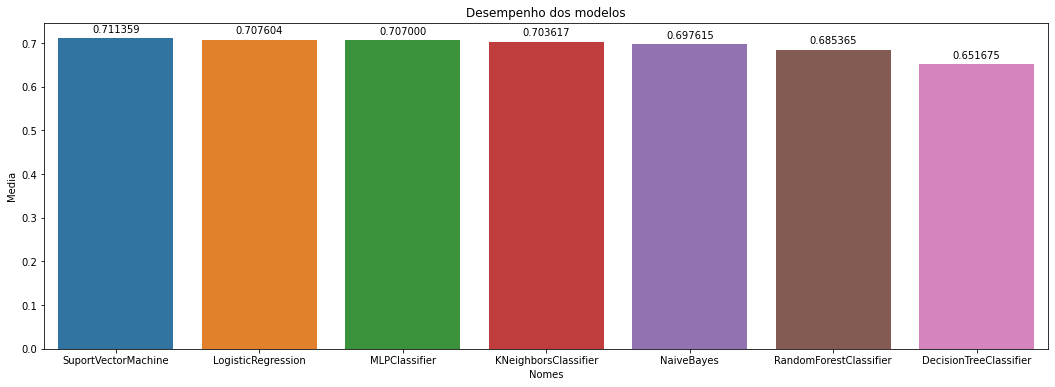

In [106]:
fig = plt.figure(figsize = (18, 6))
splot = sns.barplot(x="Nomes", y="Media", data=nome_resultado.sort_values(by="Media", ascending=False))

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Desempenho dos modelos")

# Definição do modelo

Conforme pudemos ver a comparação entre os dois gráficos, os algoritmos Suport Vector Machine e Regressão Logística tiveram os melhores desempenhos entre os modelos treinados, enquanto o algoritmo MLPClassifier teve um desempenho significativamente superior quando utilizamos apenas 5 variáveis. A medida de desempenho aqui utilizada foi a F1-Score, que é como uma média ponderada entre a precisação e o recall, onde a precisão é o número de resultados positivos verdadeiros dividido pelo número de todos os resultados positivos. Enquanto o recall é o número de resultados positivos verdadeiros dividos pelo número de todas as amostras que deveriam ter sido identificada como positivas.

